### Chapter 4: Causality

In [1]:
import dill
dill.load_session('notebook_env.db')

AttributeError: Can't get attribute 'FrozenNDArray' on <module 'pandas.core.indexes.frozen' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\core\\indexes\\frozen.py'>

#### 1. Use the NOTEARS Algorithm to factorise a graphical structure

#### Clean data to be suitable for Chapter 4

In [2]:
#Get a verbose list of chosen features
#features_chosen[features_reduced]

# Data Cleaning
data_train = pd.concat([Xtrain[features_chosen[features_reduced]],Ytrain],axis=1)
data_train = data_train.rename(columns={'Metoprolol Tartrate': 'Metoprolol_Tartrate', 'Extracorporeal circulation auxiliary to open heart surgery':'ExtracorporealCirculation', 'Calcium Gluconate': 'Calcium_Gluconate', 'Insulin Human Regular':'Insulin_Human_Regular', 'Nitroprusside Sodium': 'Nitroprusside_Sodium','Urea Nitrogen':'Urea_Nitrogen', 'Vancomycin HCl': 'Vancomycin_HCl','Single internal mammary-coronary artery bypass':'Single_artery_bypass'})
data_test = pd.concat([Xtest[features_chosen[features_reduced]],Ytest],axis=1)
data_test = data_test.rename(columns={'Metoprolol Tartrate': 'Metoprolol_Tartrate', 'Extracorporeal circulation auxiliary to open heart surgery':'ExtracorporealCirculation', 'Calcium Gluconate': 'Calcium_Gluconate', 'Insulin Human Regular':'Insulin_Human_Regular', 'Nitroprusside Sodium': 'Nitroprusside_Sodium','Urea Nitrogen':'Urea_Nitrogen', 'Vancomycin HCl': 'Vancomycin_HCl','Single internal mammary-coronary artery bypass':'Single_artery_bypass'})

#### Run the models

In [3]:
import causalnex
import warnings
warnings.filterwarnings("ignore")
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

sm = StructureModel()
sm = from_pandas(data_train, w_threshold=0.2)
sm.edges

OutEdgeView([('age', 'Metoprolol_Tartrate'), ('age', 'expire_flag'), ('RDW', 'age'), ('RDW', 'Metoprolol_Tartrate'), ('RDW', 'MCHC'), ('RDW', 'Metoprolol'), ('RDW', 'Levofloxacin'), ('RDW', 'ExtracorporealCirculation'), ('RDW', 'pH'), ('RDW', 'Furosemide'), ('RDW', 'Acetaminophen'), ('RDW', 'Calcium_Gluconate'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Aspirin'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Metoprolol'), ('Neostigmine', 'Levofloxacin'), ('Neostigmine', 'Nitroprusside_Sodium'), ('Neostigmine', 'Acetaminophen'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'Insulin_Human_Regular'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Metoprolol'), ('Urea_Nitrogen', 'pH'), ('Urea_Nitrogen', 'Atorvastatin'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nit

#### Vary the weights, and show the change in important connections

In [4]:
sm_truncate = sm.copy()
sm_truncate.remove_edges_below_threshold(0.5)
sm_truncate.edges

OutEdgeView([('age', 'expire_flag'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nitrogen', 'expire_flag'), ('Metoprolol_Tartrate', 'Metoprolol'), ('MCHC', 'pH'), ('Creatinine', 'age'), ('Creatinine', 'Urea_Nitrogen'), ('Creatinine', 'Aspirin'), ('Creatinine', 'Furosemide'), ('ExtracorporealCirculation', 'Neostigmine'), ('ExtracorporealCirculation', 'Metoprolol_Tartrate'), ('ExtracorporealCirculation', 'Single_artery_bypass'), ('ExtracorporealCirculation', 'Acetaminophen'), ('Hemoglobin', 'MCHC')])

#### Draw graph

In [3]:
import networkx as nx

sm_G = nx.DiGraph()

sm_G.add_nodes_from(features_chosen[features_reduced])
sm_G.add_edges_from([('age', 'expire_flag'), ('RDW', 'Hemoglobin'), ('age', 'expire_flag'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nitrogen', 'expire_flag'), ('Metoprolol_Tartrate', 'Metoprolol'), ('MCHC', 'pH'), ('Creatinine', 'age'), ('Creatinine', 'Urea_Nitrogen'), ('Creatinine', 'Aspirin'), ('Creatinine', 'Furosemide'), ('ExtracorporealCirculation', 'Neostigmine'), ('ExtracorporealCirculation', 'Metoprolol_Tartrate'), ('ExtracorporealCirculation', 'Single_artery_bypass'), ('ExtracorporealCirculation', 'Acetaminophen'), ('Hemoglobin', 'MCHC')])

plt.figure()
nx.draw(sm_G, with_labels=True, node_size=500, node_color="skyblue", node_shape="o")
plt.show()

#### 2. Build the Bayesian Network, assuming the causal structure previously found in the last section

#### Cleaning: Binarise Data. NB: Many variables in the dataset are currently continuous. The simple method to treat this as a low-high kind of binarisation

In [5]:
# Training Set
for i in range(data_train.shape[0]):
    for j in range(data_train.shape[1]):
        if data_train.iloc[i,j]> 0.5:
            data_train.iloc[i,j] = 1
        else: 
            data_train.iloc[i,j] = 0
# Test Set
for i in range(data_test.shape[0]):
    for j in range(data_test.shape[1]):
        if data_test.iloc[i,j]> 0.5:
            data_test.iloc[i,j] = 1
        else: 
            data_test.iloc[i,j] = 0

#### Build the network

In [4]:
from causalnex.network import BayesianNetwork
# Based on the structure in SM, build the Bayesian Network.
bn = BayesianNetwork(sm)
# Train the model with the conditional probability.
bn = bn.fit_node_states(data_train)
bn = bn.fit_cpds(data_train, method="BayesianEstimator", bayes_prior="K2")

C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


#### For a certain feature, calculate the conditional probability

In [44]:
bn.cpds["Hemoglobin"]
#bn.cpds["expire_flag"]
#bn.cpds["RDW"]

ExtracorporealCirculation       0.0                                           \
PTT                             0.0                                            
RDW                             0.0                           1.0              
Single_artery_bypass            0.0            1.0            0.0        1.0   
Urea_Nitrogen                   0.0  1.0       0.0  1.0       0.0  1.0   0.0   
Hemoglobin                                                                     
0.0                        0.744925  0.8  0.591549  0.5  0.927835  0.5  0.75   
1.0                        0.255075  0.2  0.408451  0.5  0.072165  0.5  0.25   

ExtracorporealCirculation                      ...  1.0                      \
PTT                                  1.0       ...  0.0            1.0        
RDW                                  0.0       ...  1.0            0.0        
Single_artery_bypass                 0.0       ...  1.0            0.0        
Urea_Nitrogen              1.0       0.0  1.0  ...  0.0  1.0       0.0  1.0   
Hemoglobin                                     ...                            
0.0                        0.5  0.709877  0.5  ...  0.5  0.5  0.666667  0.5   
1.0                        0.5  0.290123  0.5  ...  0.5  0.5  0.333333  0.5   

ExtracorporealCirculation                                 
PTT                                                       
RDW                                   1.0                 
Single_artery_bypass        1.0       0.0       1.0       
Urea_Nitrogen               0.0  1.0  0.0  1.0  0.0  1.0  
Hemoglobin                                                
0.0                        0.75  0.5  0.5  0.5  0.5  0.5  
1.0                        0.25  0.5  0.5  0.5  0.5  0.5  

[2 rows x 32 columns]

#### 3. Establish do-calculus

#### Build the do-calculus model

In [8]:
from causalnex.inference import InferenceEngine

# Build the inference estimator
ie = InferenceEngine(bn)
marginals = ie.query()
# Get proportion of a certain feature in the dataset
marginals['expire_flag']

{0.0: 0.6660925483370058, 1.0: 0.333907451662994}

#### Condition on input variables: change the parent variable and see how it affects a child variable

In [9]:
# Query what happens if condition on having input variables in a particular range (age = 0 or age = 1)
marginals_short = ie.query({"age": 0.0})
marginals_long = ie.query({"age": 1.0})
print("1. Output | Age low", ie.query({"age": 0.0})["expire_flag"])
print("2. Output | Age high", ie.query({"age": 1.0})["expire_flag"])

1. Output | Age low {0.0: 0.8014490233177152, 1.0: 0.19855097668228486}
2. Output | Age high {0.0: 0.639115804108584, 1.0: 0.360884195891416}


In [18]:
for i in data_test.columns.values:
    print("Feature " + i + 
          ": Original value: %.4f" % (InferenceEngine(bn).query()['expire_flag'][1.0]) + 
          ", Modify to 0: %.4f" % (InferenceEngine(bn).query({i: 0.0})["expire_flag"][1.0]) +  
          ", Modify to 1: %.4f" % (InferenceEngine(bn).query({i: 1.0})["expire_flag"][1.0]))

Feature age: Original value: 0.3339, Modify to 0: 0.1986, Modify to 1: 0.3609
Feature RDW: Original value: 0.3339, Modify to 0: 0.3204, Modify to 1: 0.6791
Feature Neostigmine: Original value: 0.3339, Modify to 0: 0.3344, Modify to 1: 0.3334
Feature Urea_Nitrogen: Original value: 0.3339, Modify to 0: 0.3335, Modify to 1: 0.5533
Feature Metoprolol_Tartrate: Original value: 0.3339, Modify to 0: 0.3316, Modify to 1: 0.3384
Feature Aspirin: Original value: 0.3339, Modify to 0: 0.3332, Modify to 1: 0.3342
Feature Insulin_Human_Regular: Original value: 0.3339, Modify to 0: 0.3342, Modify to 1: 0.3335
Feature Nitroglycerin: Original value: 0.3339, Modify to 0: 0.3344, Modify to 1: 0.3335
Feature MCHC: Original value: 0.3339, Modify to 0: 0.3792, Modify to 1: 0.3284
Feature Metoprolol: Original value: 0.3339, Modify to 0: 0.3339, Modify to 1: 0.3340
Feature Single_artery_bypass: Original value: 0.3339, Modify to 0: 0.3338, Modify to 1: 0.3376
Feature pO2: Original value: 0.3339, Modify to 0: 0

#### Do-intervention: What if we enact a change on the probability distribution of the parent variable (in this case, age)?

In [10]:
print("Previous Marginal", ie.query()["expire_flag"])
ie.do_intervention("age",{0.0: 1,1.0: 0})
print("Previous Marginal", ie.query()["expire_flag"])

Previous Marginal {0.0: 0.6660925483370058, 1.0: 0.333907451662994}
Previous Marginal {0.0: 0.812412556469365, 1.0: 0.18758744353063528}


#### 4. Obtain model Accuracy

In [11]:
from causalnex.evaluation import classification_report
## TRAINING SET
classification_report(bn, data_train, "expire_flag")

{'accuracy': 0.6808080808080809,
 'expire_flag_0.0': {'f1-score': 0.8041322314049587,
  'precision': 0.6799440950384347,
  'recall': 0.9838220424671386,
  'support': 1978},
 'expire_flag_1.0': {'f1-score': 0.13818181818181818,
  'precision': 0.7037037037037037,
  'recall': 0.07661290322580645,
  'support': 992},
 'macro avg': {'f1-score': 0.47115702479338845,
  'precision': 0.6918238993710693,
  'recall': 0.5302174728464725,
  'support': 2970},
 'weighted avg': {'f1-score': 0.5817003088738626,
  'precision': 0.6878799643299993,
  'recall': 0.6808080808080809,
  'support': 2970}}

In [12]:
## TEST SET
classification_report(bn, data_test, "expire_flag")

{'accuracy': 0.6797979797979798,
 'expire_flag_0.0': {'f1-score': 0.8037151702786378,
  'precision': 0.6788702928870293,
  'recall': 0.9848254931714719,
  'support': 659},
 'expire_flag_1.0': {'f1-score': 0.1315068493150685,
  'precision': 0.7058823529411765,
  'recall': 0.07250755287009064,
  'support': 331},
 'macro avg': {'f1-score': 0.46761100979685316,
  'precision': 0.6923763229141029,
  'recall': 0.5286665230207813,
  'support': 990},
 'weighted avg': {'f1-score': 0.5789667316534445,
  'precision': 0.687901597814224,
  'recall': 0.6797979797979798,
  'support': 990}}

#### 5. Conclusions:

TO DO: 
1. Instead of binarising, set into groups

1. Causal models are ok
2. Bayesian Networks allows the conditional probabilities to be found

Drawbacks:
1. Model is very much incorrect - a lot of connections do not make sense. For example, why does the RDW -> age connection make sense?
2. The accuracy for these models is abysmal. A possibility could be because the feature values are binarised

In [13]:
sm.edges

OutEdgeView([('age', 'Metoprolol_Tartrate'), ('age', 'expire_flag'), ('RDW', 'age'), ('RDW', 'Metoprolol_Tartrate'), ('RDW', 'MCHC'), ('RDW', 'Metoprolol'), ('RDW', 'Levofloxacin'), ('RDW', 'ExtracorporealCirculation'), ('RDW', 'pH'), ('RDW', 'Furosemide'), ('RDW', 'Acetaminophen'), ('RDW', 'Calcium_Gluconate'), ('RDW', 'Hemoglobin'), ('RDW', 'expire_flag'), ('Neostigmine', 'Aspirin'), ('Neostigmine', 'Insulin_Human_Regular'), ('Neostigmine', 'Nitroglycerin'), ('Neostigmine', 'Metoprolol'), ('Neostigmine', 'Levofloxacin'), ('Neostigmine', 'Nitroprusside_Sodium'), ('Neostigmine', 'Acetaminophen'), ('Neostigmine', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'age'), ('Urea_Nitrogen', 'RDW'), ('Urea_Nitrogen', 'Insulin_Human_Regular'), ('Urea_Nitrogen', 'MCHC'), ('Urea_Nitrogen', 'Metoprolol'), ('Urea_Nitrogen', 'pH'), ('Urea_Nitrogen', 'Atorvastatin'), ('Urea_Nitrogen', 'Furosemide'), ('Urea_Nitrogen', 'Calcium_Gluconate'), ('Urea_Nitrogen', 'Hemoglobin'), ('Urea_Nitrogen', 'PTT'), ('Urea_Nit

#### [IGNORE] Build Chow-Lin Trees (NOTE: BayesianNetwork cannot be pickled)

### Section 2: Find the set of average treatment effects.

#### Attempt to build a set of ML models

In [45]:
Xtrain_reduced = Xtrain[features_chosen[features_reduced]]
Xtest_reduced = Xtest[features_chosen[features_reduced]]

#### 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
LR_reduced = LogisticRegression(solver='liblinear',penalty="l2",multi_class='ovr',max_iter=5)
LR_reduced.fit(Xtrain_reduced,Ytrain)
print("Logistic Regression")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,LR_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,LR_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,LR_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,LR_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,LR_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,LR_reduced.predict(Xtest_reduced)), 6)))

LR_calibrated_reduced = CalibratedClassifierCV(LR_reduced, method='sigmoid', cv=5)
LR_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

Logistic Regression
Training Accuracy: 0.784512
Training ROC-AUC: 0.737469
Training F1: 0.648738
Test Accuracy: 0.764646
Test ROC-AUC: 0.717206
Test F1: 0.619902


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=5,
                                                         multi_class='ovr',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='liblinear',
                                                         tol=0.0001, verbose=0,
                                             

#### 2. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_params = [200,3,7]
RF_reduced = RandomForestClassifier(n_estimators=rf_params[0],min_samples_leaf=rf_params[1],max_depth=rf_params[2],criterion='entropy')

RF_reduced.fit(Xtrain_reduced,Ytrain)
print("Random Forest")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,RF_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,RF_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,RF_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,RF_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,RF_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,RF_reduced.predict(Xtest_reduced)), 6)))

RF_calibrated_reduced = CalibratedClassifierCV(RF_best, method='sigmoid', cv=5)
RF_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

Random Forest
Training Accuracy: 0.844781
Training ROC-AUC: 0.806083
Training F1: 0.74795
Test Accuracy: 0.762626
Test ROC-AUC: 0.717193
Test F1: 0.620355


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             class_weight=None,
                                                             criterion='entropy',
                                                             max_depth=7,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=3,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             n_estimators=200,
                

#### 3. XGBoost

In [19]:
# 3. XGBoost
xgb_params = [0.02,200,5,7]
from xgboost.sklearn import XGBClassifier
XGBoost_reduced = XGBClassifier(learning_rate=xgb_params[0],n_estimators=xgb_params[1],max_depth=xgb_params[2],min_child_weight=xgb_params[3])

XGBoost_reduced.fit(Xtrain_reduced,Ytrain)
print("XGBoost")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,XGBoost_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,XGBoost_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,XGBoost_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,XGBoost_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,XGBoost_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,XGBoost_reduced.predict(Xtest_reduced)), 6)))

XGBoost_calibrated_reduced = CalibratedClassifierCV(XGBoost_reduced, method='sigmoid', cv=5)
XGBoost_calibrated_reduced.fit(Xtrain_reduced,Ytrain)


XGBoost
Training Accuracy: 0.851178
Training ROC-AUC: 0.818926
Training F1: 0.764141
Test Accuracy: 0.764646
Test ROC-AUC: 0.721717
Test F1: 0.6272


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.02,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=7,
                                                    missing=None,
                                                    n_estimators=200, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=0, reg_alpha=0,
                                                    reg

#### 4. MLP

In [17]:
from sklearn.neural_network import MLPClassifier
MLP_best_reduced = MLPClassifier(hidden_layer_sizes=(80,20,5), max_iter=25, alpha=0.0015, solver='adam', verbose=None, tol=0.00001)

MLP_best_reduced.fit(Xtrain_reduced,Ytrain)
print("MLP")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,MLP_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,MLP_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,MLP_best_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,MLP_best_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,MLP_best_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,MLP_best_reduced.predict(Xtest_reduced)), 6)))

MLP_calibrated_reduced = CalibratedClassifierCV(MLP_best_reduced, method='sigmoid', cv=5)
MLP_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

MLP
Training Accuracy: 0.80101
Training ROC-AUC: 0.766186
Training F1: 0.689438
Test Accuracy: 0.755556
Test ROC-AUC: 0.714889
Test F1: 0.618297


CalibratedClassifierCV(base_estimator=MLPClassifier(activation='relu',
                                                    alpha=0.0015,
                                                    batch_size='auto',
                                                    beta_1=0.9, beta_2=0.999,
                                                    early_stopping=False,
                                                    epsilon=1e-08,
                                                    hidden_layer_sizes=(80, 20,
                                                                        5),
                                                    learning_rate='constant',
                                                    learning_rate_init=0.001,
                                                    max_iter=25, momentum=0.9,
                                                    n_iter_no_change=10,
                                                    nesterovs_momentum=True,
                                

#### 5. SVM

In [45]:
from sklearn.svm import SVC
SVC_best_reduced = SVC(C=5,kernel='rbf',probability=True)
SVC_best_reduced.fit(Xtrain_reduced,Ytrain)
print("SVM")
print("Training Accuracy: " + str(round(accuracy_score(Ytrain,SVC_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training ROC-AUC: " + str(round(roc_auc_score(Ytrain,SVC_best_reduced.predict(Xtrain_reduced)), 6)))
print("Training F1: " + str(round(f1_score(Ytrain,SVC_best_reduced.predict(Xtrain_reduced)), 6)))
print("Test Accuracy: " + str(round(accuracy_score(Ytest,SVC_best_reduced.predict(Xtest_reduced)), 6)))
print("Test ROC-AUC: " + str(round(roc_auc_score(Ytest,SVC_best_reduced.predict(Xtest_reduced)), 6)))
print("Test F1: " + str(round(f1_score(Ytest,SVC_best_reduced.predict(Xtest_reduced)), 6)))

SVC_best_calibrated_reduced = CalibratedClassifierCV(SVC_best_reduced, method='sigmoid', cv=5)
SVC_best_calibrated_reduced.fit(Xtrain_reduced,Ytrain)

C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM
Training Accuracy: 0.795286
Training ROC-AUC: 0.746311
Training F1: 0.66147
Test Accuracy: 0.760606
Test ROC-AUC: 0.706653
Test F1: 0.603015


C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ming\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

CalibratedClassifierCV(base_estimator=SVC(C=5, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto_deprecated',
                                          kernel='rbf', max_iter=-1,
                                          probability=True, random_state=None,
                                          shrinking=True, tol=0.001,
                                          verbose=False),
                       cv=5, method='sigmoid')

### Part 1: Average Treatment Effects

In [20]:
## Select feature to perturb
idx = 2
print(features_chosen[shap_population_rank[idx]])
np.unique(Xtest_reduced[features_chosen[shap_population_rank[idx]]])

Neostigmine


array([0., 1.])

#### Segregate into feature = 0 or feature = 1

In [45]:
# Split the Training and Test Set into 0 and 1
# Split X
Xtrain_reduced_0 = Xtrain_reduced[Xtrain_reduced[features_chosen[shap_population_rank[idx]]] == 0]
Xtrain_reduced_1 = Xtrain_reduced[Xtrain_reduced[features_chosen[shap_population_rank[idx]]] == 1]
Xtest_reduced_0 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 0]
Xtest_reduced_1 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 1]

### ATE on Raw Data

In [213]:
# Build a causal model. Y = outcome, D = treatment, X = all other features
idx = 9
from causalinference import CausalModel
cm_raw = CausalModel(Y = Ytrain.values,
                 D = Xtrain_reduced[features_chosen[features_reduced[idx]]].values,
                 X = Xtrain_reduced[features_chosen[np.concatenate([features_reduced[0:idx], features_reduced[idx+1:]])]].values)

In [214]:
cm_raw.est_propensity()
cm_raw.est_via_matching()

In [215]:
print(features_chosen[shap_population_rank[idx]])
print(cm_raw.estimates)

Metoprolol

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.027      0.043      0.633      0.527     -0.057      0.110
           ATC     -0.044      0.046     -0.950      0.342     -0.135      0.047
           ATT      0.143      0.074      1.923      0.054     -0.003      0.289



In [158]:
cm_raw

In [195]:
print(cm_raw.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept    -14.142      2.625     -5.388      0.000    -19.286     -8.997
            X0      0.099      1.134      0.087      0.931     -2.124      2.322
            X1     -0.316      1.871     -0.169      0.866     -3.984      3.352
            X2    -11.289      4.343     -2.599      0.009    -19.802     -2.777
            X3      1.465      0.686      2.136      0.033      0.121      2.810
            X4      2.089      0.595      3.511      0.000      0.923      3.255
            X5      3.060      0.517      5.921      0.000      2.047      4.073
            X6      2.468      0.505      4.891      0.000      1.479      3.457
            X7     -1.672      2.149     -0.778      0.436     -5.885      2.540
            X8      0.817      0.620      1.318      0.188     -0.

In [166]:
cm_raw.trim_s()
cm_raw.cutoff

C:\Users\Ming\Anaconda3\lib\site-packages\causalinference\causal.py:165: RuntimeWarning: divide by zero encountered in true_divide
  g = 1.0/(pscore*(1-pscore))  # 1 over Bernoulli variance


0

In [203]:
cm_raw.stratify_s()

C:\Users\Ming\Anaconda3\lib\site-packages\causalinference\core\summary.py:110: RuntimeWarning: invalid value encountered in true_divide
  return (mean_t-mean_c) / np.sqrt((sd_c**2+sd_t**2)/2)


In [204]:
print(cm_raw.strata)


Stratification Summary

              Propensity Score         Sample Size     Ave. Propensity   Outcome
   Stratum      Min.      Max.  Controls   Treated  Controls   Treated  Raw-diff
--------------------------------------------------------------------------------
         1     0.003     0.398       620       124     0.148     0.288    -0.082
         2     0.399     0.607       172       199     0.497     0.506    -0.053
         3     0.607     0.813       117       254     0.705     0.701    -0.071
         4     0.815     0.999        30      1454     0.922     0.983    -0.332



In [177]:
cm_raw.est_via_matching()


In [181]:
print(cm_raw.summary_stats)


Summary Statistics

                      Controls (N_c=1565)        Treated (N_t=1405)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.497        0.500        0.152        0.359       -0.345

                      Controls (N_c=1565)        Treated (N_t=1405)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.694        0.210        0.673        0.158       -0.113
             X1        0.236        0.138        0.168        0.081       -0.598
             X2        0.100        0.082        0.063        0.035       -0.585
             X3        0.239        0.427        0.443        0.497        0.441
             X4        0.410        0.492        0.989        0.106        1.625
      

In [42]:
propensity = cm_raw.propensity["fitted"]
Xtrain_truth = Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1
Xtrain_inv_propensity = Ytrain_reduced_output*np.where(Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1, 1 / propensity, 1 / (1 - propensity))
print("Doubly Robust Weighting Estimator: %.4f" %((np.sum(Xtrain_inv_propensity[Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1]) - np.sum(Xtrain_inv_propensity[Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 0]))/Xtrain_reduced.shape[0] ))

Doubly Robust Weighting Estimator: 0.5281


### ATE on Machine Learning Outcomes

In [138]:
Xtrain_reduced = Xtrain[features_chosen[features_reduced]]
Xtest_reduced = Xtest[features_chosen[features_reduced]]
idx = 9

#### For a single machine learning model, calculate the ATE of the control (originally X = 0)

In [128]:
# Set the original dataset
Xtest_reduced_0 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 0]

# Get the original outcome for a machine learning model
outcome_original_0 = LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1]
print("Original Average Output of X=0: %.4f" % (np.mean(outcome_original_0)))

# Enact the change and measure the output
Xtest_reduced_0[features_chosen[shap_population_rank[idx]]] = 1
outcome_changed_0 = LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1]
print("Treated Average Output of X=0: %.4f" % (np.mean(outcome_changed_0)))
print("ATE, Control %.4f" % (np.mean(outcome_changed_0 - outcome_original_0)))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(outcome_changed_0) != np.round(outcome_original_0))*100/len(outcome_changed_0)) )

Original Average Output of X=0: 0.5002
Treated Average Output of X=0: 0.4586
ATE, Control -0.0416
8.99% of samples changed prediction from 0 to 1


C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### For a single machine learning model, Calculate the ATE of the treated (originally X = 1)

In [129]:
# Set the original dataset
Xtest_reduced_1 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 1]

# Get the original outcome for a machine learning model
outcome_original_1 = LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1]
print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_original_1)))

# Enact the change and measure the output
Xtest_reduced_1[features_chosen[shap_population_rank[idx]]] = 0
outcome_changed_1 = LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1]
print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_changed_1)))
print("ATE, Treated %.4f" % (np.mean(outcome_changed_1 - outcome_original_1)))
print("%.2f%% of samples changed prediction from 1 to 0" % (np.sum(np.round(outcome_changed_1) != np.round(outcome_original_1))*100/len(outcome_original_1)) )

Original Mean Output of X=1: 0.2017
Original Mean Output of X=1: 0.2282
ATE, Treated 0.0265
2.87% of samples changed prediction from 1 to 0


C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


####  For a single machine learning model, get ATE of all samples

In [130]:
# Enact the change and measure the output
print("Original Mean Output: %.4f" % (np.mean(np.concatenate((outcome_original_1,outcome_original_0)))))
print("Treated Average Output: %.4f" % (np.mean(np.concatenate((outcome_changed_1,outcome_changed_0)))))
print("ATE, Control %.4f" % (np.mean(np.concatenate((outcome_changed_1 - outcome_original_1,outcome_original_0 - outcome_changed_0)))))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(np.concatenate((outcome_changed_1,outcome_changed_0))) != np.round(np.concatenate((outcome_original_1,outcome_original_0))))*100/(len(outcome_changed_0)+len(outcome_changed_1))) )

Original Mean Output: 0.3425
Treated Average Output: 0.3369
ATE, Control 0.0336
5.76% of samples changed prediction from 0 to 1


#### Averaging across all machine learning models: ATE of Control (X=0)

In [139]:
Xtest_reduced_0 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 0]

outcome_original_0 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     SVC_best_calibrated.predict_proba(Xtest_reduced_0)[:,1]])
print("Original Average Output of X=0: %.4f" % (np.mean(outcome_original_0)))

# Enact the change and measure the output
Xtest_reduced_0[features_chosen[shap_population_rank[idx]]] = 1

outcome_changed_0 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_0)[:,1],
                                     SVC_best_calibrated.predict_proba(Xtest_reduced_0)[:,1],])

print("Treated Average Output of X=0: %.4f" % (np.mean(outcome_changed_0)))
print("ATE, Control %.4f" % (np.mean(outcome_changed_0 - outcome_original_0)))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(outcome_changed_0) != np.round(outcome_original_0))*100/len(outcome_changed_0)) )

Original Average Output of X=0: 0.3329


C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Treated Average Output of X=0: 0.3656
ATE, Control 0.0327
4.49% of samples changed prediction from 0 to 1


#### Averaging across all machine learning models: ATE of Treated (X=1)

In [140]:
# Set the original dataset
Xtest_reduced_1 = Xtest_reduced[Xtest_reduced[features_chosen[shap_population_rank[idx]]] == 1]

# Get the original outcome for a machine learning model
outcome_original_1 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     SVC_best_calibrated.predict_proba(Xtest_reduced_1)[:,1]])
print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_original_1)))

# Enact the change and measure the output
Xtest_reduced_1[features_chosen[shap_population_rank[idx]]] = 0
outcome_changed_1 = np.concatenate([LR_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     RF_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     XGBoost_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     MLP_calibrated_reduced.predict_proba(Xtest_reduced_1)[:,1],
                                     SVC_best_calibrated.predict_proba(Xtest_reduced_1)[:,1],])

print("Original Mean Output of X=1: %.4f" % (np.mean(outcome_changed_1)))
print("ATE, Treated %.4f" % (np.mean(outcome_changed_1 - outcome_original_1)))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(outcome_changed_1) != np.round(outcome_original_1))*100/len(outcome_original_1)) )

Original Mean Output of X=1: 0.3544


C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Original Mean Output of X=1: 0.3133
ATE, Treated -0.0410
5.29% of samples changed prediction from 0 to 1


#### Averaging across all machine learning models: ATE  of all

In [141]:
# Enact the change and measure the output
print("Original Mean Output: %.4f" % (np.mean(np.concatenate((outcome_original_1,outcome_original_0)))))
print("Treated Average Output: %.4f" % (np.mean(np.concatenate((outcome_changed_1,outcome_changed_0)))))
print("ATE, Control %.4f" % (np.mean(np.concatenate([outcome_changed_1 - outcome_original_1,outcome_original_0 - outcome_changed_0]))))
print("%.2f%% of samples changed prediction from 0 to 1" % (np.sum(np.round(np.concatenate((outcome_changed_1,outcome_changed_0))) != np.round(np.concatenate((outcome_original_1,outcome_original_0))))*100/(len(outcome_changed_0)+len(outcome_changed_1))) )

Original Mean Output: 0.3415
Treated Average Output: 0.3447
ATE, Control -0.0361
4.81% of samples changed prediction from 0 to 1


### Part 2: ATE/Propensity Score Matching

In [278]:
Ytrain_reduced_output = 0.2*(LR_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     RF_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     MLP_calibrated_reduced.predict_proba(Xtrain_reduced)[:,1]+
                                     SVC_best_calibrated.predict_proba(Xtrain_reduced)[:,1])

#### For a particular feature and particular model, calculate ATE using matching

In [242]:
# Build a causal model. Y = outcome, D = treatment, X = all other features
idx = 9
from causalinference import CausalModel
cm = CausalModel(Y = Ytrain_reduced_output,
                 D = Xtrain_reduced[features_chosen[features_reduced[idx]]].values,
                 X = Xtrain_reduced[features_chosen[np.concatenate([features_reduced[0:idx], features_reduced[idx+1:]])]].values)

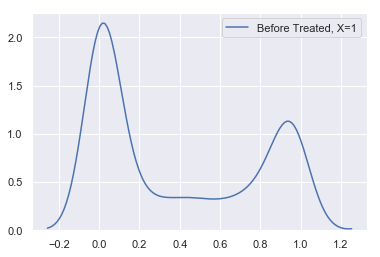

In [5]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
sns.kdeplot(cm.propensity["fitted"], label="Before Treated, X=1")

In [243]:
cm.est_propensity()
#cm.trim_s()
cm.est_via_matching()
print(cm.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.047      0.011      4.261      0.000      0.025      0.069
           ATC      0.040      0.012      3.213      0.001      0.016      0.064
           ATT      0.058      0.018      3.182      0.001      0.022      0.094



#### Inverse Weighted Propensity Score

In [44]:
propensity = cm.propensity["fitted"]
Xtrain_truth = Xtrain_reduced[features_chosen[features_reduced[2]]].values == 1

Xtrain_inv_propensity = Ytrain_reduced_output*np.where(Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1, 1 / propensity, 1 / (1 - propensity))
print("Doubly Robust Weighting Estimator: %.4f" %((np.sum(Xtrain_inv_propensity[Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 1]) - np.sum(Xtrain_inv_propensity[Xtrain_reduced[features_chosen[features_reduced[idx]]].values == 0]))/Xtrain_reduced.shape[0] ))

Doubly Robust Weighting Estimator: -0.2036


### Part 3. Feature Importance Matching

In [47]:
# Get the SHAP values for each domain
LR_reduced_SHAP = shap.KernelExplainer(LR_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,10))
RF_reduced_SHAP = shap.KernelExplainer(RF_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,10))
XGB_reduced_SHAP = shap.KernelExplainer(XGBoost_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,10))
MLP_reduced_SHAP = shap.KernelExplainer(MLP_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,10))
SVM_reduced_SHAP = shap.KernelExplainer(SVC_best_calibrated_reduced.predict_proba, shap.kmeans(Xtrain_reduced,10))

In [50]:
# Get a bunch of SHAP values for the entire population
Xtest_reduced = Xtest[features_chosen[features_reduced]]
shap_population_reduced = np.zeros((990,24))
for i in range(990):
    print(i)
    shap_population_reduced[i,:] = return_shaps_final(Xtest_reduced,i,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

KeyboardInterrupt: 

#### Perturb and get new SHAP values

In [23]:
## Get average SHAP value
idx = 9
np.mean(np.abs(shap_population_reduced[:,idx]))

0.02238745024971514

In [24]:
# Perturb the original dataset such that the features become 0 or 1.
Xtest_reduced = Xtest[features_chosen[features_reduced]]
Xtest_reduced[features_chosen[features_reduced[idx]]] = 1 - Xtest_reduced[features_chosen[features_reduced[idx]]]
# Get the bunch of SHAP values
shap_population_reduced_perturbed = np.zeros((200,24))
for i in range(200):
    print(i)
    shap_population_reduced_perturbed[i,:] = return_shaps_final(Xtest_reduced,i,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

0


C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


1


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


2


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


3


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


4


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


5


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


6


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


7


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


8


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


9


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


10


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


11


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


12


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


13


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


14


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


15


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


16


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


17


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


18


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


19


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


20


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


21


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


22


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


23


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


24


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


25


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


26


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


27


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


28


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


29


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


30


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


31


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


32


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


33


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


34


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


35


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


36


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


37


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


38


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


39


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


40


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


41


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


42


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


43


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


44


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


45


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


46


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


47


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


48


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


49


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


50


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


51


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


52


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


53


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


54


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


55


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


56


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


57


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


58


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


59


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


60


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


61


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


62


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


63


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


64


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


65


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


66


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


67


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


68


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


69


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


70


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


71


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


72


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


73


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


74


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


75


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


76


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


77


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


78


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


79


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


80


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


81


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


82


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


83


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


84


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


85


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


86


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


87


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


88


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


89


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


90


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


91


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


92


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


93


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


94


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


95


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


96


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


97


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


98


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


99


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


100


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


101


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


102


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


103


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


104


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


105


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


106


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


107


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


108


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


109


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


110


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


111


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


112


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


113


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


114


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


115


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


116


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


117


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


118


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


119


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


120


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


121


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


122


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


123


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


124


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


125


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


126


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


127


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


128


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


129


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


130


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


131


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


132


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


133


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


134


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


135


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


136


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


137


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


138


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


139


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


140


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


141


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


142


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


143


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


144


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


145


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


146


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


147


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


148


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


149


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


150


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


151


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


152


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


153


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


154


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


155


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


156


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


157


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


158


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


159


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


160


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


161


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


162


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


163


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


164


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


165


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


166


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


167


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


168


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


169


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


170


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


171


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


172


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


173


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


174


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


175


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


176


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


177


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


178


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


179


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


180


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


181


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


182


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


183


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


184


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


185


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


186


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


187


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


188


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


189


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


190


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


191


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


192


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


193


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


194


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


195


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


196


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


197


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


198


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


199


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


#### Plot the graph of each class to SHAP values

In [25]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
sns.kdeplot(shap_population_reduced[:,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1], 
            label="Before Treated, X=1")
sns.kdeplot(shap_population_reduced_perturbed[:,idx][ Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1],
            label="After Treated, do(X=0)")
plt.xlabel('Feature Values of treated groups (X=1) for ' + features_chosen[features_reduced[idx]] ) 
plt.ylabel('Percentage of feature importance values') 
plt.title('Plot of feature importance change, for original X=1 cases')
plt.show()

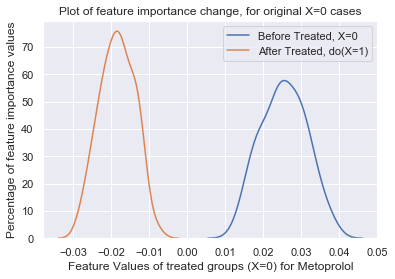

In [26]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
sns.kdeplot(shap_population_reduced[:,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0], 
            label="Before Treated, X=0")
sns.kdeplot(shap_population_reduced_perturbed[:,idx][ Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0],
            label="After Treated, do(X=1)")
plt.xlabel('Feature Values of treated groups (X=0) for ' + features_chosen[features_reduced[idx]] ) 
plt.ylabel('Percentage of feature importance values') 
plt.title('Plot of feature importance change, for original X=0 cases')
plt.show()

In [28]:
print("Average Treatment Effect for Control: %.4f"
% (np.mean(shap_population_reduced[:,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0]
- shap_population_reduced_perturbed[:,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 0])) )
print("Average Treatment Effect for Intervention: %.4f"
% (np.mean(shap_population_reduced[:,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1]
- shap_population_reduced_perturbed[:,idx][Xtest_reduced[features_chosen[features_reduced[idx]]][:200] == 1])) )
print("Average Treatment Effect for All: %.4f"
% (np.mean(np.abs(shap_population_reduced[:,idx] - shap_population_reduced_perturbed[:,idx])) ) )

Average Treatment Effect for Control: 0.0438
Average Treatment Effect for Intervention: -0.0419
Average Treatment Effect for All: 0.0430


## SECTION 2: Using Feature Important Values

### Instance-Specific Feature Values

### Part 4: Modify the interventional features one by one

In [186]:
# Reset
Xtest_reduced = Xtest[features_chosen[features_reduced]]

# Get SHAP values
shap_values_A_reduced = return_shaps(Xtest_reduced,86,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])[-1,:]
shap_values_B_reduced = return_shaps(Xtest_reduced,404,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])[-1,:]
shap_values_C_reduced = return_shaps(Xtest_reduced,147,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])[-1,:]

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


#### Set the general parameters

In [196]:
# Reset
Xtest_reduced = Xtest[features_chosen[features_reduced]]

## Feature values ranked
Xtest_reduced.iloc[86,:][np.argsort(shap_values_A_reduced)[::-1]]
Xtest_reduced.iloc[404,:][np.argsort(shap_values_B_reduced)[::-1]]
Xtest_reduced.iloc[147,:][np.argsort(shap_values_C_reduced)[::-1]]

## SHAP values ranked
shap_values_A_reduced[np.argsort(shap_values_A_reduced)[::-1]]
shap_values_B_reduced[np.argsort(shap_values_B_reduced)[::-1]]
shap_values_C_reduced[np.argsort(shap_values_C_reduced)[::-1]]

array([ 0.13862785,  0.06466426,  0.06255613,  0.03255714,  0.03126093,
        0.02642103,  0.02546302,  0.02521509,  0.01738153,  0.01599429,
        0.01445905,  0.01437545,  0.01023399,  0.00885592,  0.00592304,
        0.00154934, -0.00227955, -0.0028991 , -0.00910269, -0.01056029,
       -0.01163766, -0.01267053, -0.02219797, -0.03547993])

In [41]:
for i in np.argsort(shap_values_C_reduced)[::-1]:
    print('& ' + features_chosen[features_reduced][i] + ' (%.4f) \\\ \hline' %(shap_values_C_reduced[i]))

& RDW (0.1386) \\ \hline
& Vancomycin HCl (0.0647) \\ \hline
& Neostigmine (0.0626) \\ \hline
& Metoprolol Tartrate (0.0326) \\ \hline
& MCHC (0.0313) \\ \hline
& pO2 (0.0264) \\ \hline
& Single internal mammary-coronary artery bypass (0.0255) \\ \hline
& age (0.0252) \\ \hline
& Insulin Human Regular (0.0174) \\ \hline
& Nitroglycerin (0.0160) \\ \hline
& Urea Nitrogen (0.0145) \\ \hline
& Atorvastatin (0.0144) \\ \hline
& Creatinine (0.0102) \\ \hline
& Extracorporeal circulation auxiliary to open heart surgery (0.0089) \\ \hline
& Furosemide (0.0059) \\ \hline
& Hemoglobin (0.0015) \\ \hline
& Levofloxacin (-0.0023) \\ \hline
& Calcium Gluconate (-0.0029) \\ \hline
& Nitroprusside Sodium (-0.0091) \\ \hline
& Acetaminophen (-0.0106) \\ \hline
& pH (-0.0116) \\ \hline
& Aspirin (-0.0127) \\ \hline
& Metoprolol (-0.0222) \\ \hline
& PTT (-0.0355) \\ \hline


In [45]:
import warnings
warnings.filterwarnings("ignore")

#### Perturb for Feature A

In [86]:
print("Feature A")
Xtest_reduced = Xtest[features_chosen[features_reduced]].copy()
instance_temp = Xtest_reduced.iloc[86,:].copy()
print("Original model outcome: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Modification 1
print("Feature 1: Original = %.1f, Changed %.1f" % (instance_temp['Levofloxacin'], 1-instance_temp['Levofloxacin']) )
# Set change
instance_temp['Levofloxacin'] = 1 - instance_temp['Levofloxacin']
# Get model output
print("Changed outcome 1, feature Levofloxacin: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[12], shap_temp[12]))

# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 2
print("Feature 2: Original = %.1f, Changed %.1f" % (instance_temp['Neostigmine'], 1-instance_temp['Neostigmine']) )
# Set change
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get model output
print("Changed outcome 2, feature Neostigmine: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 3
print("Feature 3: Original = %.1f, Changed %.1f" % (instance_temp['Vancomycin HCl'], 1-instance_temp['Vancomycin HCl']) )
# Set change
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get model output
print("Changed outcome 3, feature Vancomycin HCl: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 4
print("Feature 4: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol Tartrate'], 1-instance_temp['Metoprolol Tartrate']) )
# Set change
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get model output
print("Changed outcome 4, feature Metoprolol Tartrate: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Modification 5
print("Feature 5: Original = %.1f, Changed %.1f" % (instance_temp['Single internal mammary-coronary artery bypass'], 
                                         1-instance_temp['Single internal mammary-coronary artery bypass']) )
# Set change
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get model output
print("Changed outcome 5, feature Single internal mammary-coronary artery bypass: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
# Reset
instance_temp = Xtest_reduced.iloc[86,:].copy()


Feature A
Original model outcome: 0.7676
Feature 1: Original = 1.0, Changed 0.0
Changed outcome 1, feature Levofloxacin: 0.6769
Original SHAP value: 0.0835, Final SHAP value: -0.0043
Feature 2: Original = 0.0, Changed 1.0
Changed outcome 2, feature Neostigmine: 0.6511
Original SHAP value: 0.0602, Final SHAP value: -0.0733
Feature 3: Original = 1.0, Changed 0.0
Changed outcome 3, feature Vancomycin HCl: 0.6717
Original SHAP value: 0.0580, Final SHAP value: -0.0166
Feature 4: Original = 0.0, Changed 1.0
Changed outcome 4, feature Metoprolol Tartrate: 0.7067
Original SHAP value: 0.0247, Final SHAP value: -0.0585
Feature 5: Original = 0.0, Changed 1.0
Changed outcome 5, feature Single internal mammary-coronary artery bypass: 0.6768
Original SHAP value: 0.0204, Final SHAP value: -0.0594


In [90]:
### Set 5 interventions at the same time
instance_temp = Xtest_reduced.iloc[86,:].copy()

# Make 5 changes
print("Output when 0 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Levofloxacin'] = 1 - instance_temp['Levofloxacin']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[12], shap_temp[12]))
print("Output when 1 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
print("Output when 2 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
print("Output when 3 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
print("Output when 4 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
print("Output when 5 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Output when 0 features are changed: 0.7676
Original SHAP value: 0.0835, Final SHAP value: -0.0031
Output when 1 features are changed: 0.6769
Original SHAP value: 0.0602, Final SHAP value: -0.0754
Output when 2 features are changed: 0.5393
Original SHAP value: 0.0580, Final SHAP value: -0.0183
Output when 3 features are changed: 0.4143
Original SHAP value: 0.0247, Final SHAP value: -0.0611
Output when 4 features are changed: 0.3305
Original SHAP value: 0.0204, Final SHAP value: -0.0484
Output when 5 features are changed: 0.2577


#### Perturb for Feature B

In [88]:
print("Feature B")
Xtest_reduced = Xtest[features_chosen[features_reduced]]
instance_temp = Xtest_reduced.iloc[404,:].copy()
print("Original model outcome: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Modification 1
print("Feature 1: Original = %.1f, Changed %.1f" % (instance_temp['Neostigmine'], 1-instance_temp['Neostigmine']) )
# Set change
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get model output
print("Changed outcome 1, feature Neostigmine: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
# Reset
temp = Xtest_reduced.iloc[404,:].copy()

# Modification 2
print("Feature 2: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol'], 1-instance_temp['Metoprolol']) )
# Set change
instance_temp['Metoprolol'] = 1 - instance_temp['Metoprolol']
# Get model output
print("Changed outcome 2, feature Metoprolol: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[9], shap_temp[9]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()

# Modification 3
print("Feature 3: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol Tartrate'], 1-instance_temp['Metoprolol Tartrate']) )
# Set change
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get model output
print("Changed outcome 3, feature Metoprolol Tartrate: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()

# Modification 4
print("Feature 4: Original = %.1f, Changed %.1f" % (instance_temp['Single internal mammary-coronary artery bypass'], 
                                                    1-instance_temp['Single internal mammary-coronary artery bypass']) )
# Set change
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get model output
print("Changed outcome 4, feature Single internal mammary-coronary artery bypass: %.4f" 
                                    %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()

# Modification 5
print("Feature 5: Original = %.1f, Changed %.1f" % (instance_temp['Insulin Human Regular'], 
                                         1-instance_temp['Insulin Human Regular']) )
# Set change
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get model output
print("Changed outcome 5, feature Insulin Human Regular: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
# Reset
instance_temp = Xtest_reduced.iloc[404,:].copy()


Feature B
Original model outcome: 0.5868
Feature 1: Original = 0.0, Changed 1.0
Changed outcome 1, feature Neostigmine: 0.3959
Original SHAP value: 0.0602, Final SHAP value: -0.0913
Feature 2: Original = 1.0, Changed 0.0
Changed outcome 2, feature Metoprolol: 0.3103
Original SHAP value: -0.0232, Final SHAP value: -0.0236
Feature 3: Original = 0.0, Changed 1.0
Changed outcome 3, feature Metoprolol Tartrate: 0.4488
Original SHAP value: 0.0247, Final SHAP value: -0.0789
Feature 4: Original = 0.0, Changed 1.0
Changed outcome 4, feature Single internal mammary-coronary artery bypass: 0.4125
Original SHAP value: 0.0204, Final SHAP value: -0.0784
Feature 5: Original = 0.0, Changed 1.0
Changed outcome 5, feature Insulin Human Regular: 0.5118
Original SHAP value: 0.0165, Final SHAP value: -0.0411


In [91]:
### Set 5 interventions at the same time
instance_temp = Xtest_reduced.iloc[147,:].copy()
print("Output when 0 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Make 5 changes
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
print("Output when 1 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol'] = 1 - instance_temp['Metoprolol']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[9], shap_temp[9]))
print("Output when 2 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
print("Output when 3 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
print("Output when 4 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
print("Output when 5 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Output when 0 features are changed: 0.5868
Original SHAP value: 0.0602, Final SHAP value: -0.0911
Output when 1 features are changed: 0.3959
Original SHAP value: -0.0232, Final SHAP value: -0.0237
Output when 2 features are changed: 0.3103
Original SHAP value: 0.0247, Final SHAP value: -0.0640
Output when 3 features are changed: 0.2245
Original SHAP value: 0.0204, Final SHAP value: -0.0461
Output when 4 features are changed: 0.1605
Original SHAP value: 0.0165, Final SHAP value: -0.0416
Output when 5 features are changed: 0.1130


#### Perturb the Feature C

In [48]:
print("Feature C")
Xtest_reduced = Xtest[features_chosen[features_reduced]]
instance_temp = Xtest_reduced.iloc[147,:].copy()
print("Original model outcome: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Modification 1
print("Feature 1: Original = %.1f, Changed %.1f" % (temp['Neostigmine'], 1-temp['Neostigmine']) )
# Set change
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get model output
print("Changed outcome 1, feature Neostigmine: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 2
print("Feature 2: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol'], 1-instance_temp['Metoprolol']) )
# Set change
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get model output
print("Changed outcome 2, feature Metoprolol: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 3
print("Feature 3: Original = %.1f, Changed %.1f" % (instance_temp['Metoprolol Tartrate'], 1-instance_temp['Metoprolol Tartrate']) )
# Set change
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get model output
print("Changed outcome 3, feature Metoprolol Tartrate: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 4
print("Feature 4: Original = %.1f, Changed %.1f" % (instance_temp['Single internal mammary-coronary artery bypass'], 
                                                    1-instance_temp['Single internal mammary-coronary artery bypass']) )
# Set change
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get model output
print("Changed outcome 4, feature Single internal mammary-coronary artery bypass: %.4f" 
                                    %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()

# Modification 5
print("Feature 5: Original = %.1f, Changed %.1f" % (instance_temp['Insulin Human Regular'], 
                                         1-instance_temp['Insulin Human Regular']) )
# Set change
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get model output
print("Changed outcome 5, feature Insulin Human Regular: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
# Reset
instance_temp = Xtest_reduced.iloc[147,:].copy()


Feature C
Original model outcome: 0.7488
Feature 1: Original = 0.0, Changed 1.0
Changed outcome 1, feature Neostigmine: 0.6338
Original SHAP value: 0.0580, Final SHAP value: -0.0185
Feature 2: Original = 0.0, Changed 1.0
Changed outcome 2, feature Metoprolol: 0.6266
Original SHAP value: 0.0602, Final SHAP value: -0.0772
Feature 3: Original = 0.0, Changed 1.0
Changed outcome 3, feature Metoprolol Tartrate: 0.6414
Original SHAP value: 0.0247, Final SHAP value: -0.0765
Feature 4: Original = 0.0, Changed 1.0
Changed outcome 4, feature Single internal mammary-coronary artery bypass: 0.6247
Original SHAP value: 0.0204, Final SHAP value: -0.0695
Feature 5: Original = 0.0, Changed 1.0
Changed outcome 5, feature Insulin Human Regular: 0.7402
Original SHAP value: 0.0165, Final SHAP value: -0.0242


In [49]:
### Set 5 interventions at the same time
instance_temp = Xtest_reduced.iloc[147,:].copy()
print("Output when 0 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

# Make 5 changes
instance_temp['Vancomycin HCl'] = 1 - instance_temp['Vancomycin HCl']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[16], shap_temp[16]))
print("Output when 1 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Neostigmine'] = 1 - instance_temp['Neostigmine']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[2], shap_temp[2]))
print("Output when 2 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Metoprolol Tartrate'] = 1 - instance_temp['Metoprolol Tartrate']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[4], shap_temp[4]))
print("Output when 3 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Single internal mammary-coronary artery bypass'] = 1 - instance_temp['Single internal mammary-coronary artery bypass']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[10], shap_temp[10]))
print("Output when 4 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))
instance_temp['Insulin Human Regular'] = 1 - instance_temp['Insulin Human Regular']
# Get SHAP output
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[6], shap_temp[6]))
print("Output when 5 features are changed: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Output when 0 features are changed: 0.7488
Original SHAP value: 0.0580, Final SHAP value: -0.0187
Output when 1 features are changed: 0.6338
Original SHAP value: 0.0602, Final SHAP value: -0.0824
Output when 2 features are changed: 0.4909
Original SHAP value: 0.0247, Final SHAP value: -0.0731
Output when 3 features are changed: 0.3740
Original SHAP value: 0.0204, Final SHAP value: -0.0597
Output when 4 features are changed: 0.2567
Original SHAP value: 0.0165, Final SHAP value: -0.0444
Output when 5 features are changed: 0.1997


### Part 5: For a particular instance, change interventions, measure outcome SHAP values

#### Make changes to the feature at index 1 (RDW)

In [121]:
shap_values_A_perturb = np.zeros((100,24))
shap_values_B_perturb = np.zeros((100,24))
shap_values_C_perturb = np.zeros((100,24))
feature_values_A_perturb = np.zeros((100,24))
feature_values_B_perturb = np.zeros((100,24))
feature_values_C_perturb = np.zeros((100,24))

In [122]:
Xtest_reduced = Xtest[features_chosen[features_reduced]]
idx = 1
for i in range(100):
    print(i)
    Xtest_reduced.iloc[:,idx] = i/100
    feature_values_A_perturb[i,:] = Xtest_reduced.iloc[86,:]
    feature_values_B_perturb[i,:] = Xtest_reduced.iloc[404,:]
    feature_values_C_perturb[i,:] = Xtest_reduced.iloc[147,:]
    shap_values_A_perturb[i,:] = return_shaps_final(Xtest_reduced,86,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_B_perturb[i,:] = return_shaps_final(Xtest_reduced,404,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_C_perturb[i,:] = return_shaps_final(Xtest_reduced,147,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

0


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


1


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


2


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


3


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


4


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


5


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


6


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


7


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


8


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


9


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


10


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


11


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


12


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


13


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


14


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


15


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


16


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


17


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


18


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


19


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


20


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


21


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


22


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


23


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


24


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


25


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


26


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


27


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


28


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


29


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


30


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


31


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


32


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


33


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


34


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


35


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


36


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


37


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


38


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


39


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


40


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


41


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


42


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


43


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


44


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


45


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


46


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


47


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


48


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


49


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


50


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


51


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


52


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


53


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


54


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


55


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


56


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


57


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


58


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


59


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


60


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


61


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


62


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


63


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


64


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


65


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


66


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


67


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


68


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


69


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


70


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


71


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


72


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


73


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


74


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


75


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


76


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


77


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


78


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


79


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


80


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


81


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


82


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


83


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


84


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


85


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


86


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


87


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


88


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


89


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


90


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


91


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


92


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


93


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


94


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


95


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


96


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


97


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


98


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


99


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

#### Record changes to A

#### Find SHAP values

In [57]:
idx = 1

In [20]:
import seaborn as sns; sns.set(color_codes=True)

In [58]:
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_A_perturb[:,idx]) 
plt.xlabel('Number of Features Used') 
plt.ylabel('Percentage Explained (%)')
plt.title('Explainability Curve of Feature '+ features_chosen[features_reduced][idx]+' for Patient A')
plt.show()

#### Find model output

In [56]:
0.2*(LR_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     RF_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     MLP_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     SVC_best_calibrated.predict_proba(feature_values_A_perturb)[:,1])
import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][1]]),max(X[features_chosen[features_reduced][1]]),
             (max(X[features_chosen[features_reduced][1]])-min(X[features_chosen[features_reduced][1]]))/100),
                0.2*(LR_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     RF_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     MLP_calibrated_reduced.predict_proba(feature_values_A_perturb)[:,1]+
                                     SVC_best_calibrated.predict_proba(feature_values_A_perturb)[:,1])) 
plt.xlabel('Modified Value of ' + features_chosen[features_reduced][1]) 
plt.ylabel('Average Model Output')
plt.title('Model Output when ' + features_chosen[features_reduced][1] + ' is modified, for Patient A')
plt.show()

### Bin Method

In [14]:
import warnings
warnings.filterwarnings("ignore")
Xtest_reduced = Xtest[features_chosen[features_reduced]]

In [127]:
distribution_reduced = get_distribution(Xtrain_reduced,Y)

#### Get the original feature value and instance

In [59]:
instance_temp = Xtest_reduced.iloc[86,:].copy()
print("Original Value %.4f" %(instance_temp[idx]))
shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
print("Original SHAP value: %.4f" %(shap_values_A_reduced[idx]))
print("Output, original: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                     SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Original Value 0.3462
Original SHAP value: 0.1039
Output, original: 0.7676


#### Get changes to a particular instance

In [143]:
# Change to various bins, 0 - 4
instance_temp = Xtest_reduced.iloc[86,:].copy()
for i in distribution_reduced.iloc[:5,idx].values:
    instance_temp[idx] = i
    shap_temp = (0.25*(LR_reduced_SHAP.shap_values(instance_temp)[1] + RF_reduced_SHAP.shap_values(instance_temp)[1] + XGB_reduced_SHAP.shap_values(instance_temp)[1] + MLP_reduced_SHAP.shap_values(instance_temp)[1]))
    print("Feature "+ str(idx) + ": %.4f" %(i))
    print("Original SHAP value: %.4f, Final SHAP value: %.4f" %(shap_values_A_reduced[idx], shap_temp[idx]))
    print("Output: %.4f" %(0.2*(LR_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         RF_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         XGBoost_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         MLP_calibrated_reduced.predict_proba(instance_temp.values.reshape(1, -1))[:,1]+
                                         SVC_best_calibrated.predict_proba(instance_temp.values.reshape(1, -1))[:,1])))

Feature 1: 0.0641
Original SHAP value: 0.1039, Final SHAP value: -0.0766
Output: 0.5978
Feature 1: 0.1090
Original SHAP value: 0.1039, Final SHAP value: -0.0615
Output: 0.6189
Feature 1: 0.1731
Original SHAP value: 0.1039, Final SHAP value: -0.0351
Output: 0.6448
Feature 1: 0.2949
Original SHAP value: 0.1039, Final SHAP value: 0.0588
Output: 0.7203
Feature 1: 0.5513
Original SHAP value: 0.1039, Final SHAP value: 0.1625
Output: 0.8167


### Part 6: Get explainability curves when outcomes are flipped

In [45]:
shap_values_A_perturb_flip = np.zeros((100,24))
shap_values_B_perturb_flip = np.zeros((100,24))
shap_values_C_perturb_flip = np.zeros((100,24))
feature_values_A_perturb_flip = np.zeros((100,24))
feature_values_B_perturb_flip = np.zeros((100,24))
feature_values_C_perturb_flip = np.zeros((100,24))

In [78]:
Xtest_reduced = Xtest[features_chosen[features_reduced]]
idx_flip = 10
Xtest_reduced.iloc[86,idx_flip] = 1 - Xtest_reduced.iloc[86,idx_flip]
Xtest_reduced.iloc[404,idx_flip] = 1 - Xtest_reduced.iloc[404,idx_flip]
Xtest_reduced.iloc[147,idx_flip] = 1 - Xtest_reduced.iloc[147,idx_flip]
idx = 1
for i in range(100):
    print(i)
    Xtest_reduced.iloc[:,idx] = i/100
    feature_values_A_perturb_flip[i,:] = Xtest_reduced.iloc[86,:]
    feature_values_B_perturb_flip[i,:] = Xtest_reduced.iloc[404,:]
    feature_values_C_perturb_flip[i,:] = Xtest_reduced.iloc[147,:]
    shap_values_A_perturb_flip[i,:] = return_shaps_final(Xtest_reduced,86,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_B_perturb_flip[i,:] = return_shaps_final(Xtest_reduced,404,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])
    shap_values_C_perturb_flip[i,:] = return_shaps_final(Xtest_reduced,147,[LR_reduced_SHAP,RF_reduced_SHAP,XGB_reduced_SHAP,MLP_reduced_SHAP])

C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0


C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ming\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = valu

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


1


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


2


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


3


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


4


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


5


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


6


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


7


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


8


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


9


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


10


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


11


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


12


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


13


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



14


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


15


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


16


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


17


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


18


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


19


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



20


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


21


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



22


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



23


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


24


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


25


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


26


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


27


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


28


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


29


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


30


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


31


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


32


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


33


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


34


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


35


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


36


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



37


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


38


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


39


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


40


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


41


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


42


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


43


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


44


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


45


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


46


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



47


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



48


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



49


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


50


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



51


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


52


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


53


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


54


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


55


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


56


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



57


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


58


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


59


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


60


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



61


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


62


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


63


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


64


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


65


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


66


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


67


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



68


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


69


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



70


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



71


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


72


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


73


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



74


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


75


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



76


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


77


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


78


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


79


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


80


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


81


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



82


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


83


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



84


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


85


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


86


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


87


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


88


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


89


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



90


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


91


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


92


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


93


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus


94


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))


95


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



96


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



97


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



98


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



99


C:\Users\Ming\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


HBox(children=(FloatProgress(value=0.0, max=1.0), HTML(value='')))

C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\Ming\Anaconda3\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


#### Plot for A

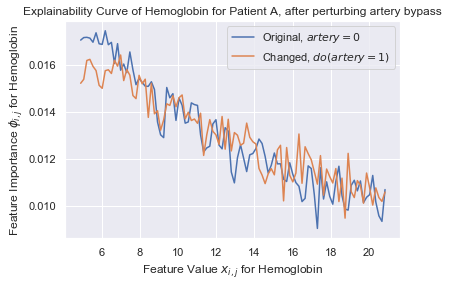

In [79]:
idx = 22; idx_flip = 10;

import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_A_perturb[:,idx], label='Original, $artery=0$') 
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_A_perturb_flip[:,idx], label='Changed, $do(artery=1)$') 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' for ' + features_chosen[features_reduced][idx]) 
plt.ylabel('Feature Importance ' + r'$\phi_{i,j}$'+ ' for ' + features_chosen[features_reduced][idx])
plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient A, after perturbing artery bypass')
#plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient A, after perturbing '+ features_chosen[features_reduced][idx_flip])
plt.legend()
plt.show()

#### Plot for B

In [80]:
idx = 22; idx_flip = 10;

import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_B_perturb[:,idx], label='Original, $artery=0$') 
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_B_perturb_flip[:,idx], label='Changed, $do(artery=1)$') 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' for ' + features_chosen[features_reduced][idx]) 
plt.ylabel('Feature Importance ' + r'$\phi_{i,j}$'+ ' for ' + features_chosen[features_reduced][idx])
plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient B, after perturbing artery bypass')
#plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient B, after perturbing '+ features_chosen[features_reduced][idx_flip])
plt.legend()
plt.show()

#### Plot for C

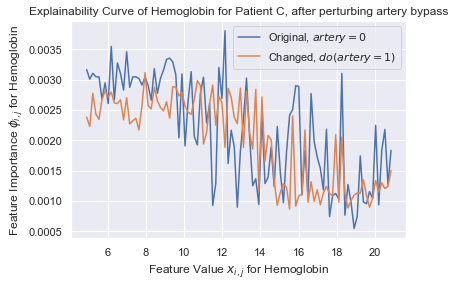

In [86]:
idx = 22; idx_flip = 10;

import matplotlib.pyplot as plt
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_C_perturb[:,idx], label='Original, $artery=0$') 
plt.plot(np.arange(min(X[features_chosen[features_reduced][idx]]),max(X[features_chosen[features_reduced][idx]]),
             (max(X[features_chosen[features_reduced][idx]])-min(X[features_chosen[features_reduced][idx]]))/100),
                shap_values_C_perturb_flip[:,idx], label='Changed, $do(artery=1)$') 
plt.xlabel('Feature Value ' + r'$x_{i,j}$' + ' for ' + features_chosen[features_reduced][idx]) 
plt.ylabel('Feature Importance ' + r'$\phi_{i,j}$'+ ' for ' + features_chosen[features_reduced][idx])
plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient C, after perturbing artery bypass')
#plt.title('Explainability Curve of '+ features_chosen[features_reduced][idx]+' for Patient C, after perturbing '+ features_chosen[features_reduced][idx_flip])
plt.legend()
plt.show()

In [87]:
import dill
dill.dump_session('notebook_env.db')